In [44]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [45]:
def euclidean(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [48]:
def main():
    #k=3
    X = pd.read_csv('kmeans.csv',index_col=False)
    print(X.head())
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    print(X.iloc[:,0])
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_kmeans,s=50)
    

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
0    5.9
1    4.6
2    6.2
3    4.7
4    5.5
5    5.0
6    4.9
7    6.7
8    5.1
9    6.0
Name: X1, dtype: float64


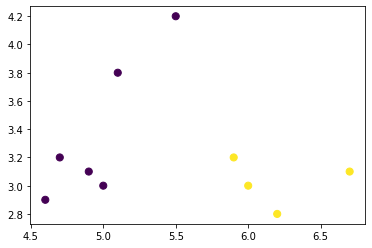

In [49]:
if __name__ == "__main__":
    main()

In [50]:
def myK():
    X = pd.read_csv('kmeans.csv',index_col=False)
    x1 = X['X1'].values
    x2 = X['X2'].values
    X = np.array(list(zip(x1,x2)))
    print(X)
    C_x = [6.2,6.6,6.5]
    C_y = [3.2,3.7,3.0]
    Centroid = np.array(list(zip(C_x,C_y)))
    print("Initial Centroids")
    print(Centroid.shape)
    Centroid_old = np.zeros(Centroid.shape)
    print(Centroid_old)
    clusters = np.zeros(len(X))
    print(clusters)
    error = euclidean(Centroid,Centroid_old,None)
    print(error)
    iterr = 0
    k = 3
    while error != 0:
        iterr = iterr+1
        for i in range((len(X))):
            print(X[i])
            distances = euclidean(X[i],Centroid)
            print(distances)
            cluster = np.argmin(distances)
            print(cluster)
            clusters[i] = cluster
        print("Cluster ",clusters)
        Centroid_old = deepcopy(Centroid)
        
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            print("points ",points)
            Centroid[p] = np.mean(points,axis=0)
        print("Centre of the clustersafter ",iterr,"Iteration \n",Centroid)
        error = euclidean(Centroid,Centroid_old,None)
        print("Error....",error)
            
            
            

In [51]:
myK()

[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]
Initial Centroids
(3, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12.53714481052205
[5.9 3.2]
[0.3        0.86023253 0.63245553]
0
[4.6 2.9]
[1.62788206 2.15406592 1.90262976]
0
[6.2 2.8]
[0.4        0.98488578 0.36055513]
2
[4.7 3.2]
[1.5        1.96468827 1.81107703]
0
[5.5 4.2]
[1.22065556 1.2083046  1.56204994]
1
[5. 3.]
[1.21655251 1.74642492 1.5       ]
0
[4.9 3.1]
[1.30384048 1.80277564 1.60312195]
0
[6.7 3.1]
[0.50990195 0.60827625 0.2236068 ]
2
[5.1 3.8]
[1.25299641 1.50332964 1.61245155]
0
[6. 3.]
[0.28284271 0.92195445 0.5       ]
0
Cluster  [0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
points  [array([5.9, 3.2]), array([4.6, 2.9]), array([4.7, 3.2]), array([5., 3.]), array([4.9, 3.1]), array([5.1, 3.8]), array([6., 3.])]
points  [array([5.5, 4.2])]
points  [array([6.2, 2.8]), array([6.7, 3.1])]
Centre of the clustersafter  1 Iteration 
 [[5.17142857 3.17142857

In [54]:
import math
cluster1 = []
cluster2 = []
cluster3 = []
x1,y1 = 6.2,3.2
x2,y2 = 6.6,3.7
x3,y3 = 6.5,3.0
points = [[5.9,3.2],
           [4.6,2.9],
           [6.2,2.8],
           [4.7,3.2],
           [5.5,4.2],
           [5.0,3.0],
           [4.9,3.1],
           [6.7,3.1],
           [5.1,3.8],
           [6.0,3.0]]

clist = []
def eucledian_distance_1(a,b,xc1,yc1,xc2,yc2,xc3,yc3):
   

    dis1 = math.sqrt((a-xc1)**2 + (b-yc1)**2)
    dis2 = math.sqrt((a-xc2)**2 + (b-yc2)**2)
    dis3 = math.sqrt((a-xc3)**2 + (b-yc3)**2)
    mind = min(dis1,dis2,dis3)
    if(mind == dis1):
        clist.append(1)
        cluster1.append([a,b])
    elif(mind==dis2):
        clist.append(2)
        cluster2.append([a,b])
    else:
        clist.append(3)
        cluster3.append([a,b])
   
       
def fnc(cls):
    sumi = 0
    sumj = 0
    for i,j in cls:
        sumi = sumi + i
        sumj = sumj + j
    ncx = (sumi/len(cls))
    ncy = (sumj/len(cls))
    return ncx,ncy

for i,j in points:
    eucledian_distance_1(i,j,x1,y1,x2,y2,x3,y3)
   
print(clist)

clist = []
nxc1,nyc1 = fnc(cluster1)
nxc2,nyc2 = fnc(cluster2)
nxc3,nyc3 = fnc(cluster3)

print("\nNew centroids are")
print("cluster1",nxc1,nyc1)
print("cluster2",nxc2,nyc2)
print("cluster3",nxc3,nyc3)

cluster1 = []
cluster2 = []
cluster3 = []

for i,j in points:
    eucledian_distance_1(i,j,nxc1,nyc1,nxc2,nyc2,nxc3,nyc3)
   

print("\n",clist)

clist = []

nxc1,nyc1 = fnc(cluster1)
nxc2,nyc2 = fnc(cluster2)
nxc3,nyc3 = fnc(cluster3)

print("\nNew centroids are")
print("cluster1",nxc1,nyc1)
print("cluster2",nxc2,nyc2)
print("cluster3",nxc3,nyc3)

cluster1 = []
cluster2 = []
cluster3 = []

for i,j in points:
    eucledian_distance_1(i,j,nxc1,nyc1,nxc2,nyc2,nxc3,nyc3)
print("\n",clist)
clist = []

nxc1,nyc1 = fnc(cluster1)
nxc2,nyc2 = fnc(cluster2)
nxc3,nyc3 = fnc(cluster3)

print("\nNew centroids are")
print("cluster1",nxc1,nyc1)
print("cluster2",nxc2,nyc2)
print("cluster3",nxc3,nyc3)

cluster1 = []
cluster2 = []
cluster3 = []

for i,j in points:
    eucledian_distance_1(i,j,nxc1,nyc1,nxc2,nyc2,nxc3,nyc3)



[1, 1, 3, 1, 2, 1, 1, 3, 1, 1]

New centroids are
cluster1 5.171428571428572 3.1714285714285713
cluster2 5.5 4.2
cluster3 6.45 2.95

 [3, 1, 3, 1, 2, 1, 1, 3, 2, 3]

New centroids are
cluster1 4.800000000000001 3.05
cluster2 5.3 4.0
cluster3 6.2 3.025

 [3, 1, 3, 1, 2, 1, 1, 3, 2, 3]

New centroids are
cluster1 4.800000000000001 3.05
cluster2 5.3 4.0
cluster3 6.2 3.025
